In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

print("\nMissing Values per Column:")
print(df.isnull().sum())

# Handle missing values:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop(columns=['Cabin'], inplace=True)

print("\nAfter Cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarke

C:\Users\spoorthy\AppData\Local\Temp\ipykernel_5160\4064306410.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\spoorthy\AppData\Local\Temp\ipykernel_5160\4064306410.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

C:\Users\spoorthy\AppData\Local\Temp\ipykernel_5160\2894577418.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="Set2")


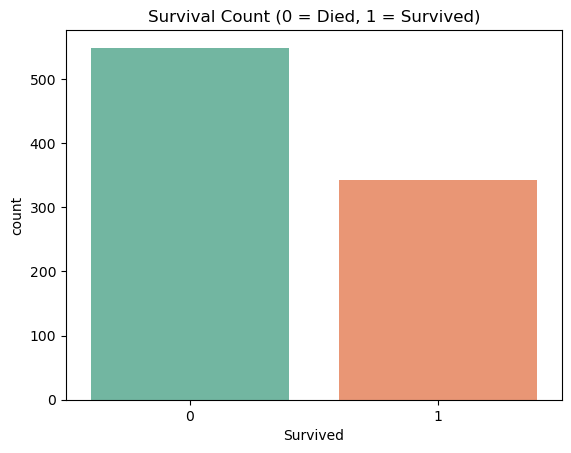

In [3]:
sns.countplot(x="Survived", data=df, palette="Set2")
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

C:\Users\spoorthy\AppData\Local\Temp\ipykernel_5160\1054673715.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=df, palette="Set1")


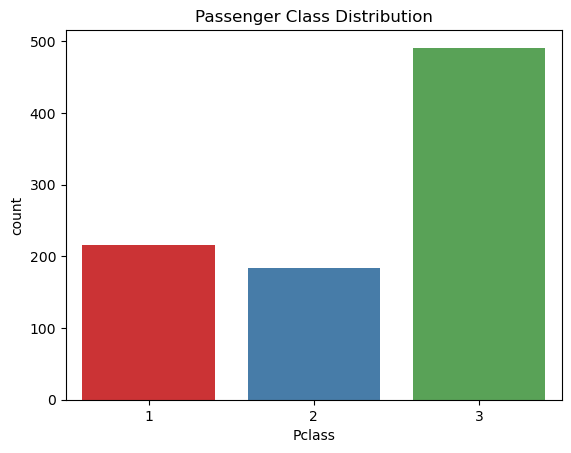

In [4]:
sns.countplot(x="Pclass", data=df, palette="Set1")
plt.title("Passenger Class Distribution")
plt.show()

C:\Users\spoorthy\AppData\Local\Temp\ipykernel_5160\2937256189.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df, palette="Set3")


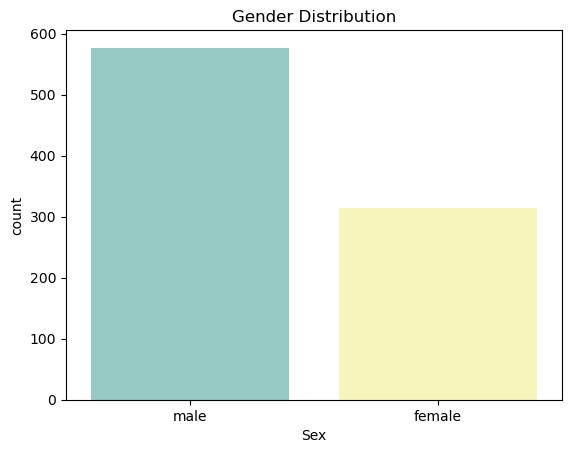

In [5]:
sns.countplot(x="Sex", data=df, palette="Set3")
plt.title("Gender Distribution")
plt.show()

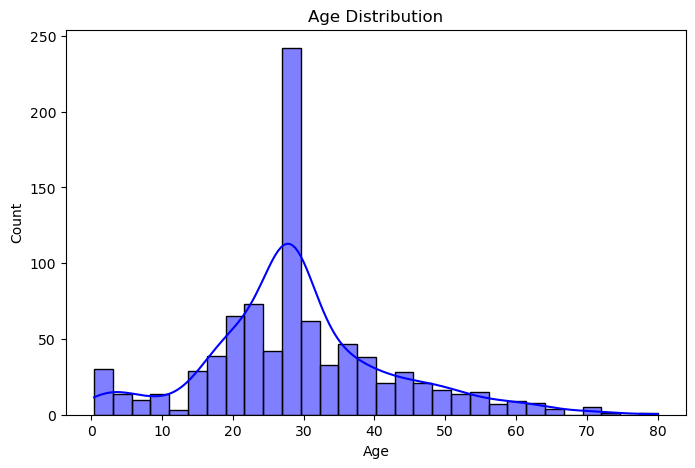

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

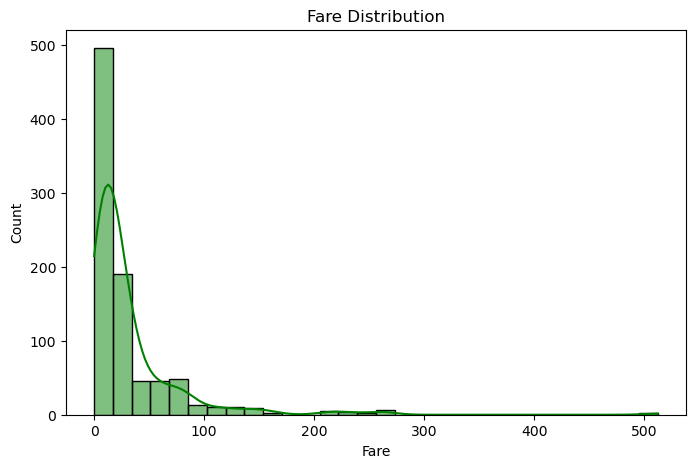

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=30, kde=True, color="green")
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.show()

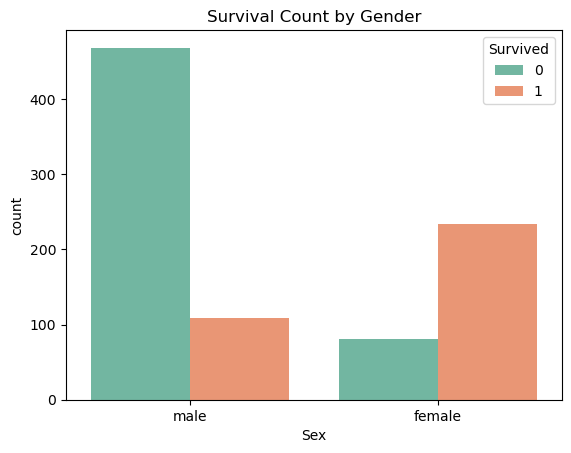

In [8]:
sns.countplot(x="Sex", hue="Survived", data=df, palette="Set2")
plt.title("Survival Count by Gender")
plt.show()

C:\Users\spoorthy\AppData\Local\Temp\ipykernel_5160\4207607726.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Survived"]==1]["Age"], shade=True, label="Survived")
C:\Users\spoorthy\AppData\Local\Temp\ipykernel_5160\4207607726.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Survived"]==0]["Age"], shade=True, label="Did Not Survive")


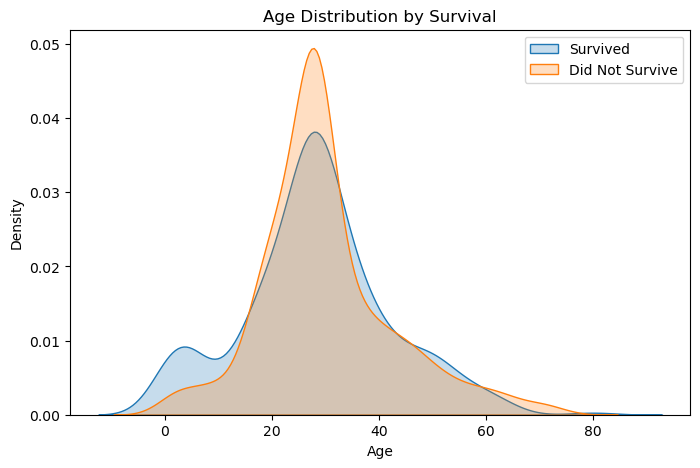

In [10]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df["Survived"]==1]["Age"], shade=True, label="Survived")
sns.kdeplot(df[df["Survived"]==0]["Age"], shade=True, label="Did Not Survive")
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.legend()
plt.show()

C:\Users\spoorthy\AppData\Local\Temp\ipykernel_5160\3669861401.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=df, palette="Set2")


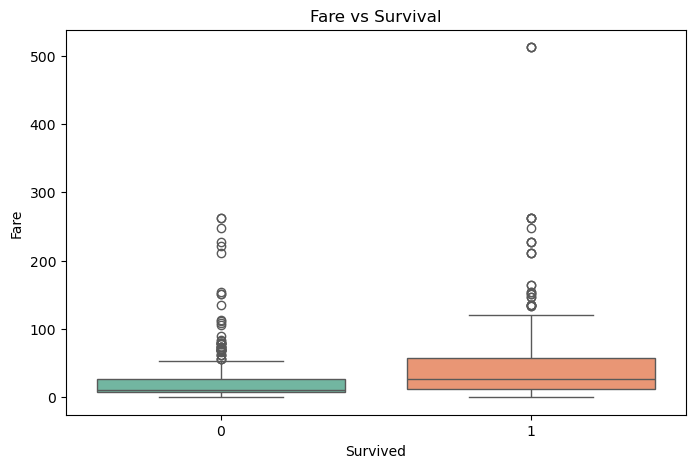

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Fare", data=df, palette="Set2")
plt.title("Fare vs Survival")
plt.show()